In [2]:

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

       Area  Room  Parking  Warehouse  Elevator             Address  \
0      63.0     1     True       True      True             Shahran   
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3      95.0     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3474   86.0     2     True       True      True  Southern Janatabad   
3475   83.0     2     True       True      True            Niavaran   
3476   75.0     2    False      False     False              Parand   
3477  105.0     2     True       True      True              Dorous   
3478   82.0     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.025000e

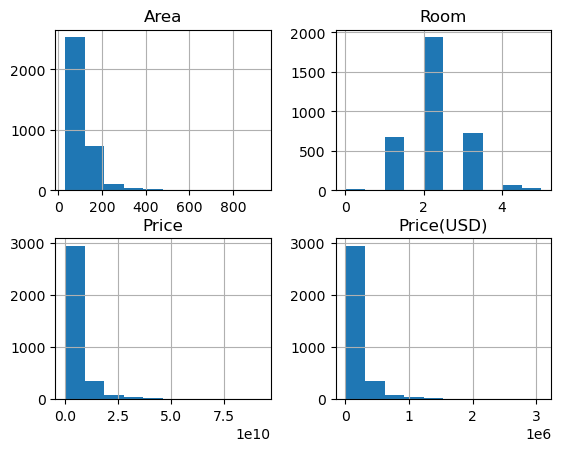

In [3]:
ndata = pd.read_csv("1632300362534233 (1).csv")

ndata['Area'] = pd.to_numeric(ndata['Area'], errors='coerce')
ndata = ndata.dropna()
ndata.hist()
ndata =  ndata[ndata["Area"]< 700]
print(ndata)


# for i in new_data.index:
#     if new_data.loc[i,"Area"]>700:
#         new_data.drop(i,axis = "index")
# print(new_data)

# data.head()
# cd = data[["Area","Room","Price"]]


In [4]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
ndata["log_Room"] = np.log1p(ndata["Room"])
ndata["Address"] = le.fit_transform( ndata["Address"])
ndata["Parking"] =  ndata["Parking"].apply(lambda x : 1 if x=="True" else  0)
ndata["Warehouse"] = ndata["Warehouse"].apply(lambda x : 1 if x == "True" else 0)
ndata["Elevator"] = ndata["Elevator"].apply(lambda x : 1 if x == "True" else 0)
ndata
#ndata.hist()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),log_Room
0,63.0,1,0,0,0,156,1.850000e+09,61666.67,0.693147
1,60.0,1,0,0,0,156,1.850000e+09,61666.67,0.693147
2,79.0,2,0,0,0,117,5.500000e+08,18333.33,1.098612
3,95.0,2,0,0,0,152,9.025000e+08,30083.33,1.098612
4,123.0,2,0,0,0,150,7.000000e+09,233333.33,1.098612
...,...,...,...,...,...,...,...,...,...
3474,86.0,2,0,0,0,163,3.500000e+09,116666.67,1.098612
3475,83.0,2,0,0,0,105,6.800000e+09,226666.67,1.098612
3476,75.0,2,0,0,0,115,3.650000e+08,12166.67,1.098612
3477,105.0,2,0,0,0,39,5.600000e+09,186666.67,1.098612


In [5]:
msk = np.random.rand(len(ndata))<0.8
train = ndata[msk]
test = ndata[~msk]



In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#train_x = np.array(train[["Address","Parking","Area","Room","Warehouse","Elevator"]])
train_x = np.array(train[["log_Room","Area"]])

train_y = np.array(train[["Price"]])
regr.fit(train_x,train_y)
#print(regr.coef_)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
#test_x = np.array(test[["Address","Parking","Area","Room","Warehouse","Elevator"]])
test_x = np.array(test[["log_Room","Area"]])

y_hat = regr.predict(test_x)
test_y = np.array(test[["Price"]])
r2_toman = r2_score(test_y,y_hat)
print(r2_toman)

0.5611137911699301


Text(0, 0.5, 'Price')

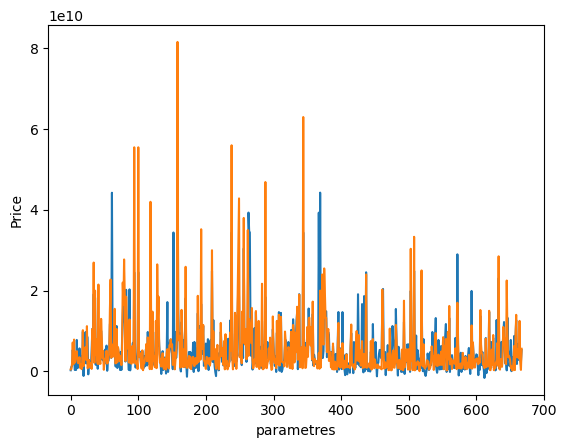

In [8]:
plt.plot(y_hat)
plt.plot(test_y)
plt.xlabel("parametres")
plt.ylabel("Price")

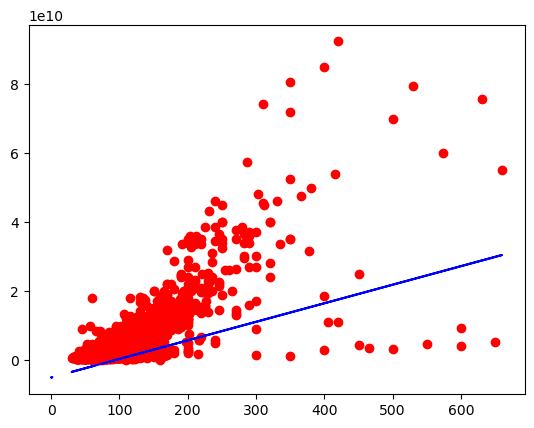

In [13]:
plt.scatter(train.Area , train_y , color = "r")
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0] , color = "b" )

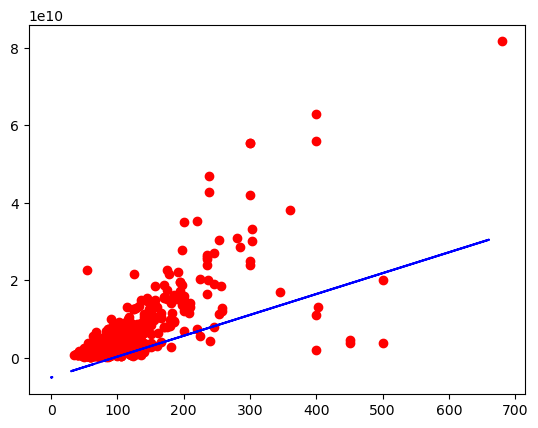

In [12]:
plt.scatter(test.Area ,test_y , color = "r")
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0] , color = "b")

In [15]:
#overfit check
from sklearn.metrics import mean_squared_error
train_y_predict = regr.predict(train_x)
train_mse = mean_squared_error(train_y , train_y_predict)
test_mse = mean_squared_error(test_y , y_hat)
print(train_mse - test_mse)

-3.5001244780824904e+18
